# Data analysis of LexTALE dataset

In [183]:
# import all necessary modules
import pandas as pd
import os
import re
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [158]:
# read in all participant files
files = os.listdir()
ind = 1
for file in files:
    if file.endswith(".csv"):
        print(f'reading {file} now')
        reg_exp = re.compile('_\d\d')
        ppnr = file.split('_')[0]
        if ind ==1:
            data = pd.read_csv(file)
            data['Pp']= ppnr
        else:
            dummy = pd.read_csv(file)
            data = pd.concat([data,dummy], sort=True)
            data.Pp.iloc[-60:] = ppnr
        ind +=1

reading 2_data_LexTALE.csv now
reading 1_data_LexTALE.csv now


In [159]:
# check the data
data.head()
#data.describe()

,Pp,error,response,rt,trial_nr,word,wordstatus
0,2,1,1,0.885188,1,mensible,0
1,2,0,1,0.654705,2,scornful,1
2,2,1,0,0.314914,3,stoutly,1
3,2,1,0,0.343030,4,ablaze,1
4,2,0,0,0.538764,5,kermshaw,0


In [160]:
# for each participant, calculate their LexTALE score and print it and save them in a new dataframe
ind = 0
scores = pd.DataFrame()
for participant in data.Pp.unique():
    ind +=1
    ppdata = data[data.Pp == participant]
    score = (((ppdata[(ppdata.wordstatus == 1) & (ppdata.error == 0)].count()/40*100) + (ppdata[(ppdata.wordstatus == 0) & (ppdata.error == 0)].count()/20*100)) / 2).unique()
    scores[ind] = score
    print(f"Participant {participant} has a score of {score[0]}%")
    

Participant 2 has a score of 73.75%
Participant 1 has a score of 77.5%


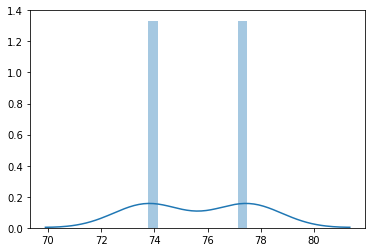

In [161]:
# make a histogram of the scores
sns.distplot(scores[:], bins = 10)

In [162]:
# check mean RT for nonwords and words per participant and store them in a new dataframe
cols = ['words', 'nonwords']
lst = []
for participant in data.Pp.unique():
    words = data[(data.Pp == participant) & (data.wordstatus == 1)]
    nonwords = data[(data.Pp == participant) & (data.wordstatus == 0)]
    lst.append([np.mean(words.rt),np.mean(nonwords.rt)])
rtmeans = pd.DataFrame(lst, columns=cols)


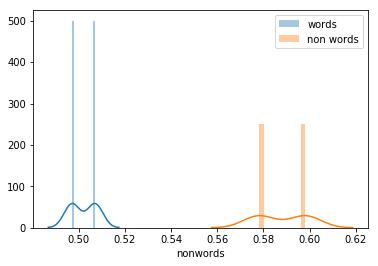

In [171]:
# plot distribution of mean RTs for words and non-words 
ind = 0 
for means in rtmeans:
    plot = sns.distplot(rtmeans.iloc[:,ind], bins = 10)
    ind +=1
plot.legend(['words', 'non words'])

In [189]:
# run a GLM to test whether people make more errors for words and nonwords
model = sm.GLM(data.error, data.wordstatus, family=sm.families.family.Binomial()) 
results = model.fit()
print(results.summary())

# run a GLM to test whether people are slower to respond for words than nonwords
modelrt = sm.GLM(data.rt, data.wordstatus, family=sm.families.family.Gaussian(link=sm.families.links.log)) 
resultsrt = modelrt.fit()
print(resultsrt.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  error   No. Observations:                  120
Model:                            GLM   Df Residuals:                      119
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -59.758
Date:                Thu, 29 Nov 2018   Deviance:                       119.52
Time:                        20:51:59   Pearson chi2:                     120.
No. Iterations:                     4   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
wordstatus    -1.8362      0.325     -5.656      0.000      -2.473      -1.200
                 Generalized Linear Model Regression